In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
DATADIR = r"C:\Users\Long_Den\Desktop\python\tensorflow, keras deep learning\dogs and cats\PetImages"
CATEGORIES = ["Dog", "Cat"]

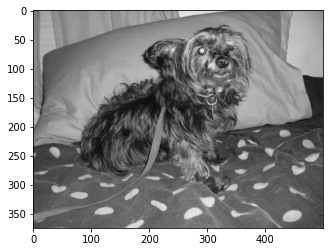

In [2]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) #
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break

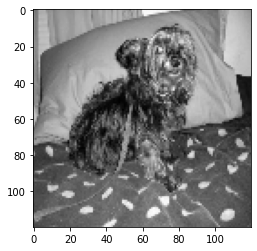

In [3]:
IMG_SIZE = 120
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE ))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [4]:
img_array.shape


(375, 500)

In [5]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:                
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [6]:
print(len(training_data))

24946


In [7]:
import random
random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print (sample[1])

1
1
1
1
0
1
0
0
1
0


In [9]:
X = []
y = []

In [10]:
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE,1)

In [11]:
import pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out, protocol=4)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out, protocol=4)
pickle_out.close()

In [12]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [13]:
X.shape

(24946, 120, 120, 1)

In [14]:
X[1:].shape

(24945, 120, 120, 1)

In [15]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2572607819895680055
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10091102208
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5349147714641100115
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [17]:
cv2.cuda.getCudaEnabledDeviceCount()

1